In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from os import listdir
from os.path import isfile, join
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution

In [3]:
def read_data(fname):
    try:
        with open(fname, "rb") as file:
            loaded_data = pickle.load(file)
        return loaded_data["buffer_data"], loaded_data["paraset"]
    except (FileNotFoundError, pickle.UnpicklingError) as e:
        print(f"Error loading file {fname}: {e}")
        return None, None
    

In [4]:
test_data, parameters = read_data("../measurement/output/20250207_odmr_tracking_snr/data_dev_pulsed_odmr_tracking_changedetection_1739314872.4265556_runlen_900.pkl")
idx_pointer = parameters['idx_pointer']
reps=parameters['reps']
t_atrack=parameters['t_ribloc'] + parameters['t_fevol']

In [5]:
# def SNR_opt(end):

#     end = int(end * 1000)


#     # Process the 'test_data' buffer and background arrays
#     buffer_mean = np.zeros_like(test_data[3])
#     bg_mean = np.zeros_like(test_data[0])

#     # For 'buffer' array
#     buffer_mean[:idx_pointer, :] = test_data[3][:idx_pointer, :] / (reps + 1)
#     buffer_mean[idx_pointer:, :] = test_data[3][idx_pointer:, :] / reps
#     data_mean = np.mean(buffer_mean[:, 0:end], axis=1)

#     # For 'bg' array
#     bg_mean[:idx_pointer, :] = test_data[0][:idx_pointer, :] / (reps + 1)
#     bg_mean[idx_pointer:, :] = test_data[0][idx_pointer:, :] / reps
#     bg_mean = np.mean(bg_mean[:, 0:end], axis=1)


#     freq = np.fft.fftfreq(len(data_mean), (t_atrack / 1E9))
#     sig_fft = np.abs(np.fft.fft(np.abs(data_mean)))
#     sig_fft -= np.abs(np.fft.fft(bg_mean))

#     positive_freqs = freq > 0
#     x=freq[positive_freqs]
#     y=(sig_fft)[positive_freqs]

#     indicies = np.where((x>= 20) & (x <= 50))[0]  # Get indices where x[3] is between 20 and 50
#     lower=np.min(indicies)
#     higher= np.max(indicies)

#     signal=np.max(y[lower:higher])

#     loc = np.where((x < lower) | (x > higher))[0]
#     noise = np.mean(np.abs(y[loc]))

#     print(signal/noise)
#     print(end)
#     return -signal/noise
    
    
# bounds = [(20 / 1000, 600 / 1000)]
# result = differential_evolution(SNR_opt, bounds=bounds,x0=300/1000)

# # Print results
# if result.success:
#     print("Optimization successful!")
#     print("Optimal value of x:", result.x)
#     print("Objective function value at minimum:", result.fun)
# else:
#     print("Optimization failed! Reason:", result.message)


In [6]:
# result.x*1000

## Peak finder 

In [7]:
from scipy.signal import find_peaks


In [8]:
end = 518

# Process the 'test_data' buffer and background arrays
buffer_mean = np.zeros_like(test_data[3])
bg_mean = np.zeros_like(test_data[0])

# For 'buffer' array
buffer_mean[:idx_pointer, :] = test_data[3][:idx_pointer, :] / (reps + 1)
buffer_mean[idx_pointer:, :] = test_data[3][idx_pointer:, :] / reps
data_mean = np.mean(buffer_mean[:, 0:end], axis=1)

# For 'bg' array
bg_mean[:idx_pointer, :] = test_data[0][:idx_pointer, :] / (reps + 1)
bg_mean[idx_pointer:, :] = test_data[0][idx_pointer:, :] / reps
bg_mean = np.mean(bg_mean[:, 0:end], axis=1)


freq = np.fft.fftfreq(len(data_mean), (t_atrack / 1E9))
sig_fft = np.abs(np.fft.fft(np.abs(data_mean)))
sig_fft -= np.abs(np.fft.fft(bg_mean))

positive_freqs = freq > 0
x=freq[positive_freqs]
y=(sig_fft)[positive_freqs]

indicies = np.where((x>= 20) & (x <= 50))[0]  # Get indices where x[3] is between 20 and 50
lower=np.min(indicies)
higher= np.max(indicies)

signal=np.max(y[lower:higher])

loc = np.where((x < lower) | (x > higher))[0]
noise = np.mean(np.abs(y[loc]))

print(signal/noise)

17.667209674652806


In [9]:
arr=np.arange(5,20)
sorted_arr = np.sort(arr)[::-1]
for items in sorted_arr:
    print(items)
    if items<10:
        break

19
18
17
16
15
14
13
12
11
10
9


In [10]:
idx_peak=np.nan
arr=np.arange(5,40)
sorted_arr = np.sort(arr)[::-1]
for items in sorted_arr:
    print(items)
    idx_peak=find_peaks(y,threshold=np.mean(y)*items)[0][0]
    print(idx_peak)
    if idx_peak!=np.nan:
        break


39
3


In [11]:
np.max(y)

0.06271913622786432

In [12]:
find_peaks(y,height=0.5*np.max(y))

(array([42], dtype=int64), {'peak_heights': array([0.06271914])})

In [13]:
find_peaks(y,rel_height=.04,width=2)

(array([1586, 3253, 4666, 6528, 7443], dtype=int64),
 {'prominences': array([0.01115018, 0.00261133, 0.01391292, 0.00538408, 0.01425184]),
  'left_bases': array([1579, 3251, 4663, 6524, 7429], dtype=int64),
  'right_bases': array([1591, 3256, 4671, 6532, 7455], dtype=int64),
  'widths': array([2.16940514, 2.06445225, 3.0315377 , 2.06669477, 2.05088978]),
  'width_heights': array([0.00313065, 0.0021472 , 0.00350804, 0.00311862, 0.00502374]),
  'left_ips': array([1583.91254489, 3251.96174719, 4664.78897679, 6526.99774077,
         7441.95114289]),
  'right_ips': array([1586.08195003, 3254.02619944, 4667.82051449, 6529.06443553,
         7444.00203267])})

In [14]:
print(find_peaks(y,threshold=noise*10)) # distance=20,threshold=10*noise))
find_peaks(y,threshold=noise*10)

(array([42], dtype=int64), {'left_thresholds': array([0.03976818]), 'right_thresholds': array([0.05732131])})


(array([42], dtype=int64),
 {'left_thresholds': array([0.03976818]),
  'right_thresholds': array([0.05732131])})

In [15]:
x[42]

32.57575757575758

In [16]:
def SNR_opt(end):

    end = int(end * 1000)


    # Process the 'test_data' buffer and background arrays
    buffer_mean = np.zeros_like(test_data[3])
    bg_mean = np.zeros_like(test_data[0])

    # For 'buffer' array
    buffer_mean[:idx_pointer, :] = test_data[3][:idx_pointer, :] / (reps + 1)
    buffer_mean[idx_pointer:, :] = test_data[3][idx_pointer:, :] / reps
    data_mean = np.mean(buffer_mean[:, 0:end], axis=1)

    # For 'bg' array
    bg_mean[:idx_pointer, :] = test_data[0][:idx_pointer, :] / (reps + 1)
    bg_mean[idx_pointer:, :] = test_data[0][idx_pointer:, :] / reps
    bg_mean = np.mean(bg_mean[:, 0:end], axis=1)


    freq = np.fft.fftfreq(len(data_mean), (t_atrack / 1E9))
    sig_fft = np.abs(np.fft.fft(np.abs(data_mean)))
    sig_fft -= np.abs(np.fft.fft(bg_mean))

    positive_freqs = freq > 0
    x=freq[positive_freqs]
    y=(sig_fft)[positive_freqs]
    
    idx_peak=find_peaks(y,height=0.5*np.max(y))[0][0]

    signal=y[idx_peak]
    indicies = np.where((x>= 20) & (x <= 50))[0]  # Get indices where x[3] is between 20 and 50
    lower=np.min(indicies)
    higher= np.max(indicies)

    signal=np.max(y[lower:higher])

    loc = np.where(x!= idx_peak)[0]
    noise = np.mean(np.abs(y[loc]))

    print(signal/noise)
    print(end)
    return -signal/noise
    
    
bounds = [(20 / 1000, 600 / 1000)]
result = differential_evolution(SNR_opt, bounds=bounds,x0=300/1000)

# Print results
if result.success:
    print("Optimization successful!")
    print("Optimal value of x:", result.x)
    print("Objective function value at minimum:", result.fun)
else:
    print("Optimization failed! Reason:", result.message)


C:\Users\HFNV\AppData\Local\Temp\ipykernel_32512\4130322600.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  end = int(end * 1000)


15.766621389611647
300
4.348396578991184
170
9.529072577026753
196
3.03597650899565
113
15.065177004005905
344
16.49977404713501
392
4.20564390423274
60
3.0256525606640796
38
17.444830007792284
478
17.11558119417878
557
14.075143596532884
269
16.38609456989342
589
17.350163330020912
428
17.45468757061102
505
12.341554894558186
242
17.264718344618217
436
14.45795439660951
280
11.515447227093636
230
17.398683031803596
472
16.671988898497432
574
16.849770193217044
399
14.01950612402812
267
17.274419492333532
435
16.517384686557712
365
17.506882196793285
509
14.10103089449421
270
16.335967484695484
594
17.45468757061102
505
17.078477046519662
451
17.078477046519662
451
15.964379625869212
310
16.449430587702988
585
17.269559071347455
407
16.423370098834127
389
11.515447227093636
230
17.108812078384283
447
17.468978776273172
484
17.45519921332188
490
17.197024990399473
461
17.405226559308232
473
16.521681193498413
581
15.137943064500133
345
16.732949453923467
572
15.763978657252306
352
17.17

In [17]:
# def SNR_opt(params):  # Accepts a vector of parameters
#     end, start = params  # Unpack parameters from the vector
    
#     # Proceed with the rest of the function as you already defined
#     if start >= end:
#         return -np.inf  # Return a very negative value to penalize invalid solutions

#     end = int(end * 1000)

#     buffer_mean = np.zeros_like(test_data[3])
#     bg_mean = np.zeros_like(test_data[0])

#     buffer_mean[:idx_pointer, :] = test_data[3][:idx_pointer, :] / (reps + 1)
#     buffer_mean[idx_pointer:, :] = test_data[3][idx_pointer:, :] / reps
#     data_mean = np.mean(buffer_mean[:, 0:end], axis=1)

#     bg_mean[:idx_pointer, :] = test_data[0][:idx_pointer, :] / (reps + 1)
#     bg_mean[idx_pointer:, :] = test_data[0][idx_pointer:, :] / reps
#     bg_mean = np.mean(bg_mean[:, 0:end], axis=1)

#     freq = np.fft.fftfreq(len(data_mean), (t_atrack / 1E9))
#     sig_fft = np.abs(np.fft.fft(np.abs(data_mean)))
#     sig_fft -= np.abs(np.fft.fft(bg_mean))

#     positive_freqs = freq > 0
#     x = freq[positive_freqs]
#     y = sig_fft[positive_freqs]

#     indicies = np.where((x >= 20) & (x <= 50))[0]  # Get indices where x[3] is between 20 and 50
#     lower = np.min(indicies)
#     higher = np.max(indicies)

#     signal = np.max(y[lower:higher])

#     loc = np.where((x < lower) | (x > higher))[0]
#     noise = np.mean(np.abs(y[loc]))

#     print(signal / noise)
#     print(end)
#     return -signal / noise


In [18]:
# bounds = [(20 / 1000, 600 / 1000), (0, 600 / 100)]  # Ensure bounds are within valid range
# result = differential_evolution(SNR_opt, bounds=bounds)  # Pass only bounds, no need for x0

# # Print results
# if result.success:
#     print("Optimization successful!")
#     print("Optimal value of x:", result.x)
#     print("Objective function value at minimum:", result.fun)
# else:
#     print("Optimization failed! Reason:", result.message)


In [19]:
# from scipy.optimize import basinhopping


# def SNR_opt(end):

#     end = int(end * 1000)


#     # Process the 'test_data' buffer and background arrays
#     buffer_mean = np.zeros_like(test_data[3])
#     bg_mean = np.zeros_like(test_data[0])

#     # For 'buffer' array
#     buffer_mean[:idx_pointer, :] = test_data[3][:idx_pointer, :] / (reps + 1)
#     buffer_mean[idx_pointer:, :] = test_data[3][idx_pointer:, :] / reps
#     data_mean = np.mean(buffer_mean[:, 0:end], axis=1)

#     # For 'bg' array
#     bg_mean[:idx_pointer, :] = test_data[0][:idx_pointer, :] / (reps + 1)
#     bg_mean[idx_pointer:, :] = test_data[0][idx_pointer:, :] / reps
#     bg_mean = np.mean(bg_mean[:, 0:end], axis=1)


#     freq = np.fft.fftfreq(len(data_mean), (t_atrack / 1E9))
#     sig_fft = np.abs(np.fft.fft(np.abs(data_mean)))
#     sig_fft -= np.abs(np.fft.fft(bg_mean))

#     positive_freqs = freq > 0
#     x=freq[positive_freqs]
#     y=(sig_fft)[positive_freqs]

#     indicies = np.where((x>= 20) & (x <= 50))[0]  # Get indices where x[3] is between 20 and 50
#     lower=np.min(indicies)
#     higher= np.max(indicies)

#     signal=np.max(y[lower:higher])

#     loc = np.where((x < lower) | (x > higher))[0]
#     noise = np.mean(np.abs(y[loc]))

#     print(signal/noise)
#     print(end)
#     return -signal/noise
    
    
# bounds = [(20 / 1000, 600 / 1000)]
# result = basinhopping(SNR_opt,x0=300/1000)

# # Print results
# if result.success:
#     print("Optimization successful!")
#     print("Optimal value of x:", result.x)
#     print("Objective function value at minimum:", result.fun)
# else:
#     print("Optimization failed! Reason:", result.message)



In [7]:
test_data, parameters = read_data("../measurement/output/20250207_odmr_tracking_snr/data_dev_pulsed_odmr_tracking_changedetection_1739314872.4265556_runlen_900.pkl")
idx_pointer = parameters['idx_pointer']
reps=parameters['reps']
t_atrack=parameters['t_ribloc'] + parameters['t_fevol']

end = 500

# Process the 'test_data' buffer and background arrays
buffer_mean = np.zeros_like(test_data[3])
bg_mean = np.zeros_like(test_data[0])

# For 'buffer' array
buffer_mean[:idx_pointer, :] = test_data[3][:idx_pointer, :] / (reps + 1)
buffer_mean[idx_pointer:, :] = test_data[3][idx_pointer:, :] / reps
data_mean = np.mean(buffer_mean[:, 0:end], axis=1)

# For 'bg' array
bg_mean[:idx_pointer, :] = test_data[0][:idx_pointer, :] / (reps + 1)
bg_mean[idx_pointer:, :] = test_data[0][idx_pointer:, :] / reps
bg_mean = np.mean(bg_mean[:, 0:end], axis=1)


freq = np.fft.fftfreq(len(data_mean), (t_atrack / 1E9))
sig_fft = np.abs(np.fft.fft(np.abs(data_mean)))
sig_fft_bg = np.abs(np.fft.fft(bg_mean))

positive_freqs = freq > 0
x=freq[positive_freqs]
y=(sig_fft)[positive_freqs]
yb=(sig_fft_bg)[positive_freqs]

indicies = np.where((x>= 20) & (x <= 50))[0]  # Get indices where x[3] is between 20 and 50
lower=np.min(indicies)
higher= np.max(indicies)

signal=np.max(y[lower:higher])

loc = np.where((x < lower) | (x > higher))[0]
noise = np.mean(np.abs(y[loc]))

print(signal/noise)

    

12.425632289813914


In [8]:
np.shape(sig_fft)

(15000,)

In [10]:

fig_fft = go.Figure()

name = ["dark", "bright", "bg", "signal"]
fig_fft.add_trace(go.Scatter(x=x, y=y, mode='lines'))
fig_fft.add_trace(go.Scatter(x=x, y=yb,mode='lines', name='Signal'))
fig_fft.update_layout(title='FFT of Signals (Positive Frequencies)',
                      xaxis_title='Frequency [Hz]',
                      yaxis_title='Amplitude')
# Show plots
fig_fft.show()


In [16]:
import numpy as np
import pandas as pd

# First DataFrame: time-domain means and t_atrack
df_time = pd.DataFrame({
    "background": bg_mean,
    "signal": data_mean,
    "t_atrack": [t_atrack] + [np.nan] * (len(bg_mean) - 1)  # only first row has t_atrack
})

# Second DataFrame: frequency-domain FFTs and t_atrack
df_fft = pd.DataFrame({
    "freq": x,
    "backgroundfft": yb,
    "sg_fft": y,
    "t_atrack": [t_atrack] + [np.nan] * (len(x) - 1)  # only first row has t_atrack
})


In [18]:
df_time.to_csv("20250425_Bz_Coil_RAWDATA.csv", index=False)
df_fft.to_csv("20250425_Bz_Coil_FFT.csv", index=False)

In [24]:
N = len(data_mean)                      # Number of samples
dt = t_atrack / 1E9                     # Sampling time step (convert ns to s)
t_vals = np.linspace(0, (N-1)*dt, N)    # Time values from 0 to (N-1)*dt

print(t_vals)

[0.000000e+00 8.800000e-05 1.760000e-04 ... 1.319736e+00 1.319824e+00
 1.319912e+00]


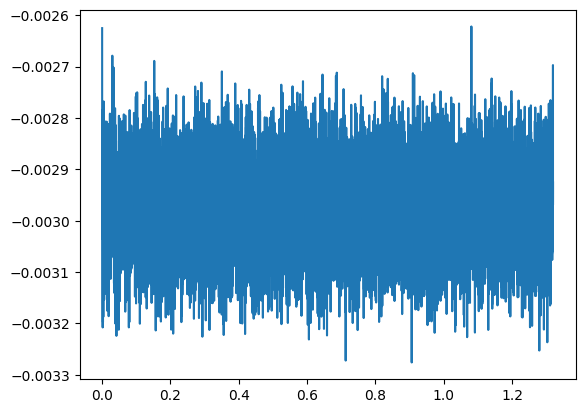

In [28]:
plt.plot(t_vals,data_mean-bg_mean)

In [26]:
len(data_mean)

15000

In [29]:
import pandas as pd

In [31]:
df = pd.DataFrame({"t": t_vals, "signal": data_mean, "background": bg_mean})

# Save to CSV (optional)
df.to_csv("modified_aeris_data_sg_bg.csv", index=False)

print(df)


              t    signal  background
0      0.000000  0.097994    0.100619
1      0.000088  0.097801    0.100764
2      0.000176  0.097804    0.100724
3      0.000264  0.097754    0.100710
4      0.000352  0.097794    0.100712
...         ...       ...         ...
14995  1.319560  0.098005    0.100972
14996  1.319648  0.098049    0.100746
14997  1.319736  0.097885    0.100855
14998  1.319824  0.097958    0.100921
14999  1.319912  0.097969    0.100895

[15000 rows x 3 columns]
